In [1]:
# import pandas as pq
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# data dir path defenition
DATA_DIR = Path().resolve() / 'data'

In [2]:
data = pq.read_table(DATA_DIR / 'dados_sensores_5000.parquet').to_pandas()
# plot some data information
print("\n Amostra de dados:\n", data.head())
print("\n Sumário estátistico:\n", data.describe())
print("\n Data info:\n", data.dtypes)


 Amostra de dados:
      empresa  energia_kwh  agua_m3  co2_emissoes      setor
0  Empresa_1      6397.10   296.58       1600.24   Educação
1  Empresa_2      2570.30   492.52        818.98      Saúde
2  Empresa_3      4166.20   158.67       2710.03      Saúde
3  Empresa_4      8781.75   211.74       2036.72   Educação
4  Empresa_5      7846.09    16.84       2179.03  Indústria

 Sumário estátistico:
        energia_kwh      agua_m3  co2_emissoes
count  5000.000000  5000.000000   5000.000000
mean   4982.012088   254.591516   1507.816080
std    2821.081316   139.225517    849.554449
min     100.620000    10.120000     51.120000
25%    2581.745000   138.082500    774.130000
50%    4936.540000   250.895000   1492.695000
75%    7425.097500   373.512500   2258.457500
max    9993.800000   499.760000   2999.640000

 Data info:
 empresa          object
energia_kwh     float64
agua_m3         float64
co2_emissoes    float64
setor            object
dtype: object


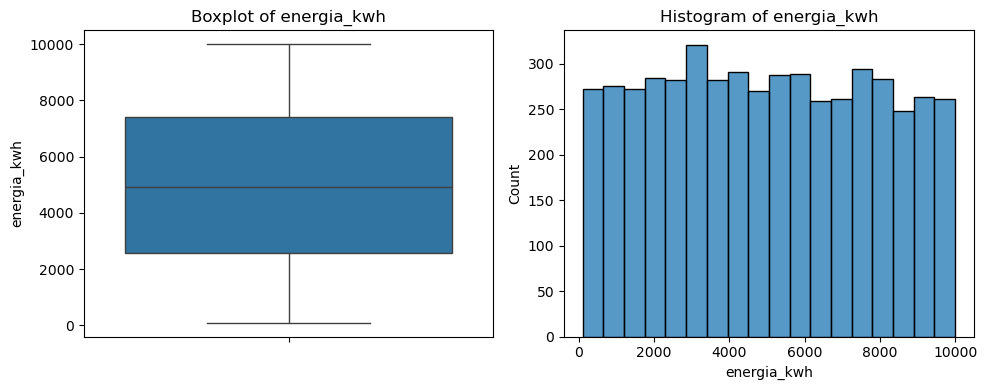

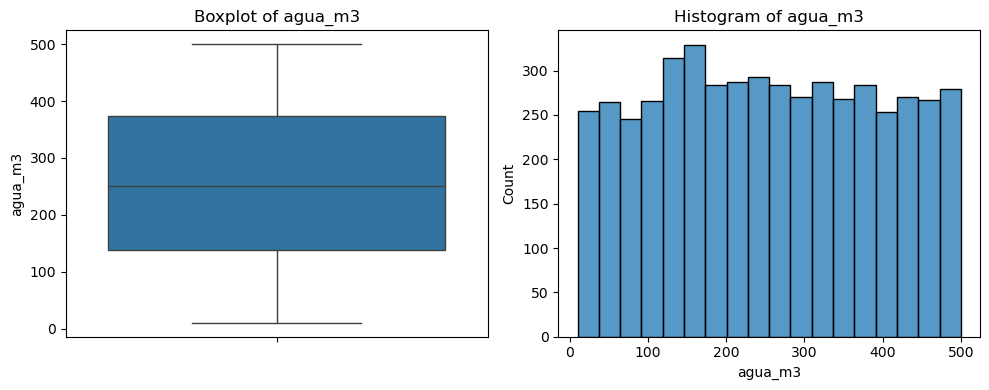

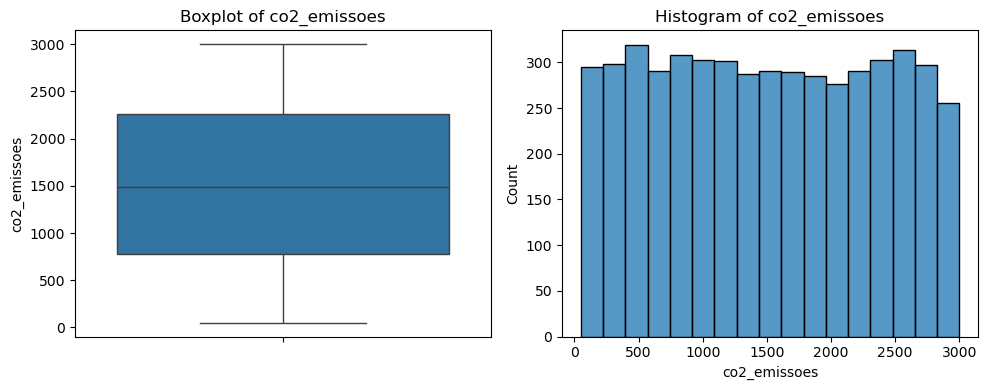

In [3]:
# plot consumptions by type and check for outliers
for column in data.columns[1:4]:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data[column])
    plt.title(f'Boxplot of {column}')

    plt.subplot(1, 2, 2)
    sns.histplot(data=data[column])
    plt.title(f'Histogram of {column}')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# geat average consumption by sector
data_sector = data[data.columns[1:]].groupby("setor").mean()
print("Consumo médio por setor:\n", data_sector)

Consumo médio por setor:
              energia_kwh     agua_m3  co2_emissoes
setor                                             
Alimentação  4820.346326  257.406468   1488.135993
Educação     5012.179532  256.899063   1561.786076
Indústria    5074.482214  250.109176   1494.268622
Saúde        4940.869728  255.785112   1475.098225
Serviços     4930.121959  250.654039   1517.344643
Varejo       5113.261993  256.788302   1513.928007


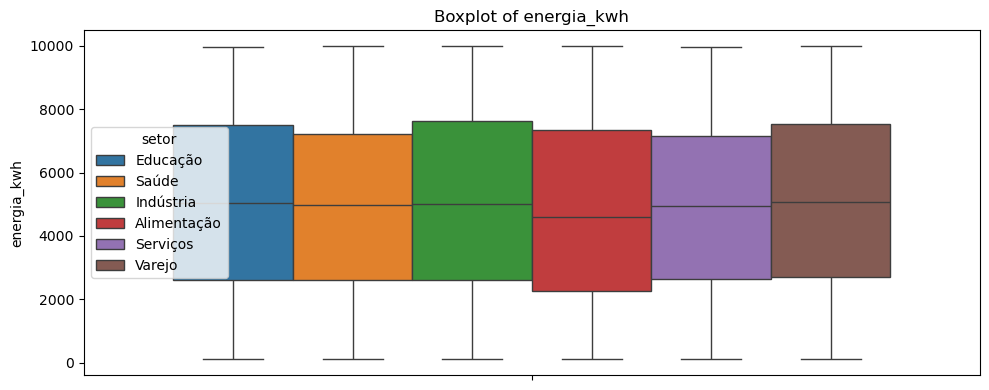

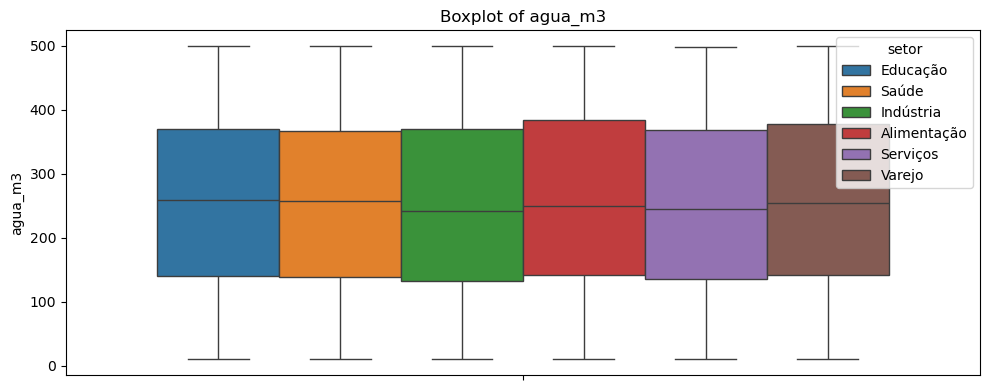

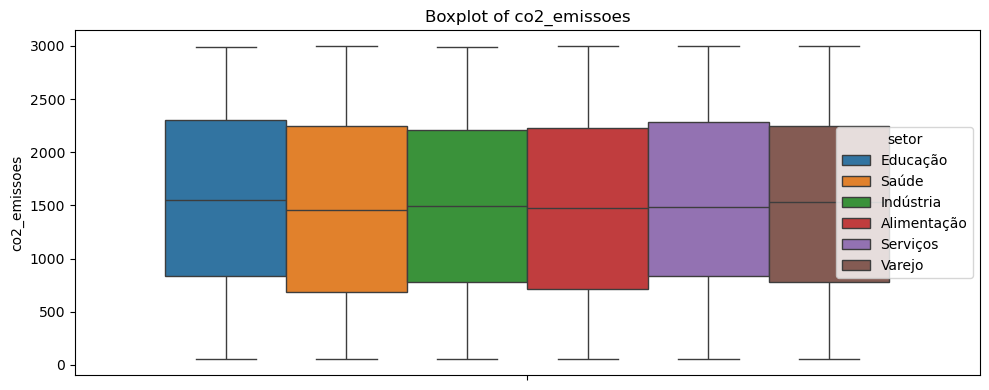

In [5]:
# check for outliers by sector for each resources type
for column in data.columns[1:4]:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=data, y=column, hue='setor')
    plt.title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

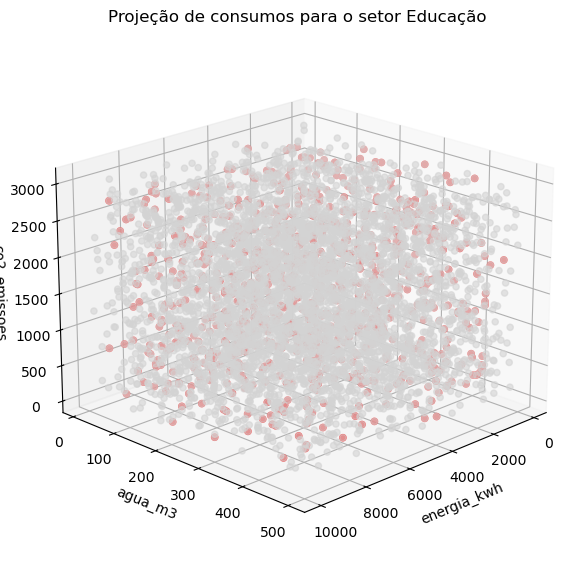

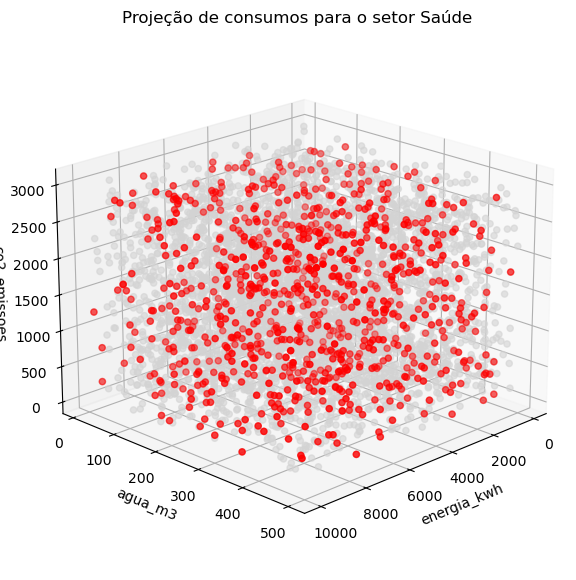

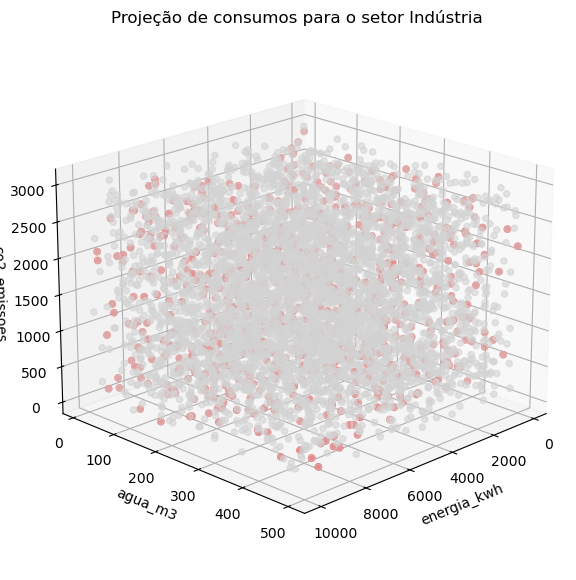

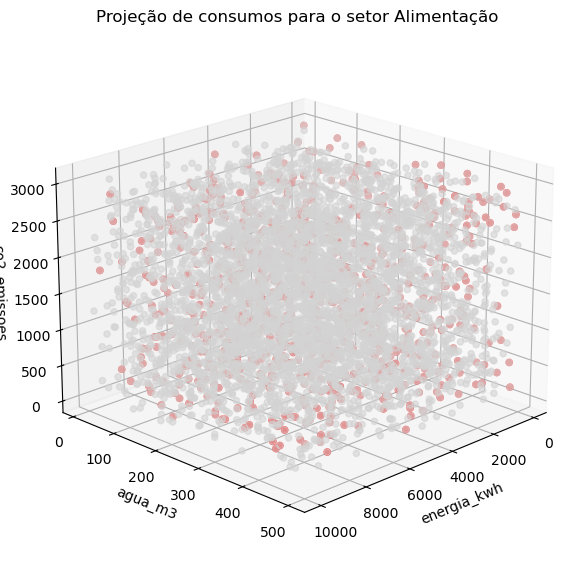

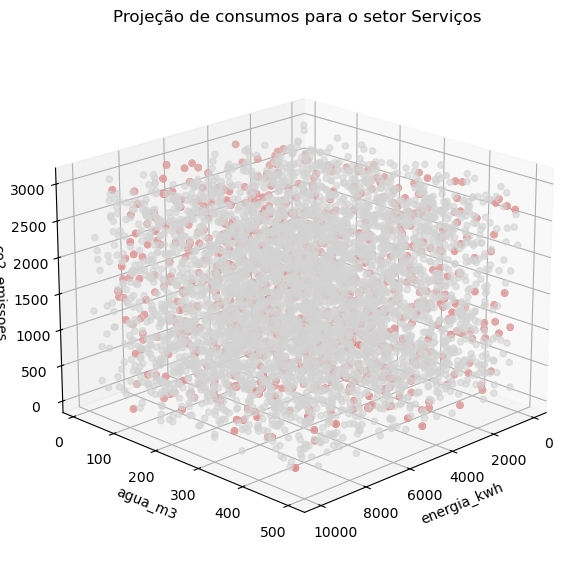

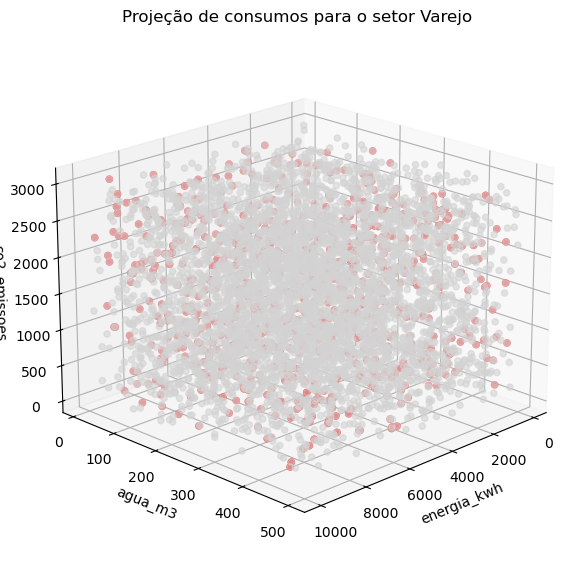

In [6]:
# Inspect spatial distribution of data.
# Evaluate the possibility of a specific sector to have a specific consumption of 2 or 3 resources.
for setor in data["setor"].unique():
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot
    ax.scatter(data["energia_kwh"], data["agua_m3"], data["co2_emissoes"], alpha=0.6, c='lightgrey')
    data_setor = data[data["setor"] == setor]
    ax.scatter(data_setor["energia_kwh"], data_setor["agua_m3"], data_setor["co2_emissoes"], c='red')
    
    # Set labels
    ax.set_xlabel("energia_kwh")
    ax.set_ylabel("agua_m3")
    ax.set_zlabel("co2_emissoes")
    ax.view_init(elev=20, azim=45)
    
    plt.title(f'Projeção de consumos para o setor {setor}')
    plt.show()

Após a análise é possível concluir que os dados estão bem caracterizados, sendo que não foi necessário nenhuma transformação inicial (conversão dtypes ou correção de erros).

Os consumos estão distribuidos uniformemente entre as empresas e não existe nenhum outlier nos mesmos.

Vendo por setor e olhando para a média dos seus consumos, podemos destacar alguns setores como potências candidatos a ter maiores consumos que outros. Contudo, expondo os consumos das empresas num plano 3D não podemos afirmar que exista uma concentração de empresas em determinados eixos que suporte a ideia que existe um setor mais/menos consumista de um determinado recurso ou conjunto de recursos.